In [2]:
from pathlib import Path
import json
import math

import matplotlib.pyplot as plt
import pandas as pd

def plot(trainer_state_path):
    with trainer_state_path.open() as fp:
        trainer_state = json.load(fp)

    log_history = trainer_state.get("log_history", [])
    if not log_history:
        raise ValueError("log_history is empty in trainer_state.json")

    log_df = pd.DataFrame(log_history)

    display(log_df.head())

    value_cols = [
        col for col in log_df.columns
        if pd.api.types.is_numeric_dtype(log_df[col]) and col != "step"
    ]

    x_values = log_df["step"] if "step" in log_df.columns else range(len(log_df))
    num_plots = len(value_cols)

    n_cols = 2
    n_rows = math.ceil(num_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3.25 * n_rows), squeeze=False)
    for ax, col in zip(axes.flat, value_cols):
        ax.plot(x_values, log_df[col], marker="o", linewidth=1.5)
        ax.set_title(col)
        ax.set_xlabel("step" if "step" in log_df.columns else "index")
        ax.set_ylabel(col)
        ax.grid(True, alpha=0.3)

    for ax in axes.flat[num_plots:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()



,accuracy,epoch,grad_norm,learning_rate,loss,margin,max_reward,mean_reward,min_reward,num_tokens,...,eval_accuracy,eval_loss,eval_margin,eval_max_reward,eval_mean_reward,eval_min_reward,eval_num_tokens,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.545312,0.01032,14.277696,0.000010,0.7665,0.164938,3.087011,0.419471,-3.175833,561009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.606250,0.02064,8.402778,0.000010,0.6505,0.335271,2.291362,-0.057295,-3.123663,1156094.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.609375,0.03096,10.768899,0.000010,0.6757,0.211285,2.908978,0.785541,-1.523649,1718200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.626563,0.04128,3.237620,0.000010,0.6565,0.211421,1.309526,-0.425721,-2.119306,2277421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.631250,0.05160,5.670028,0.000009,0.6301,0.295715,2.785594,0.826696,-1.131551,2825107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


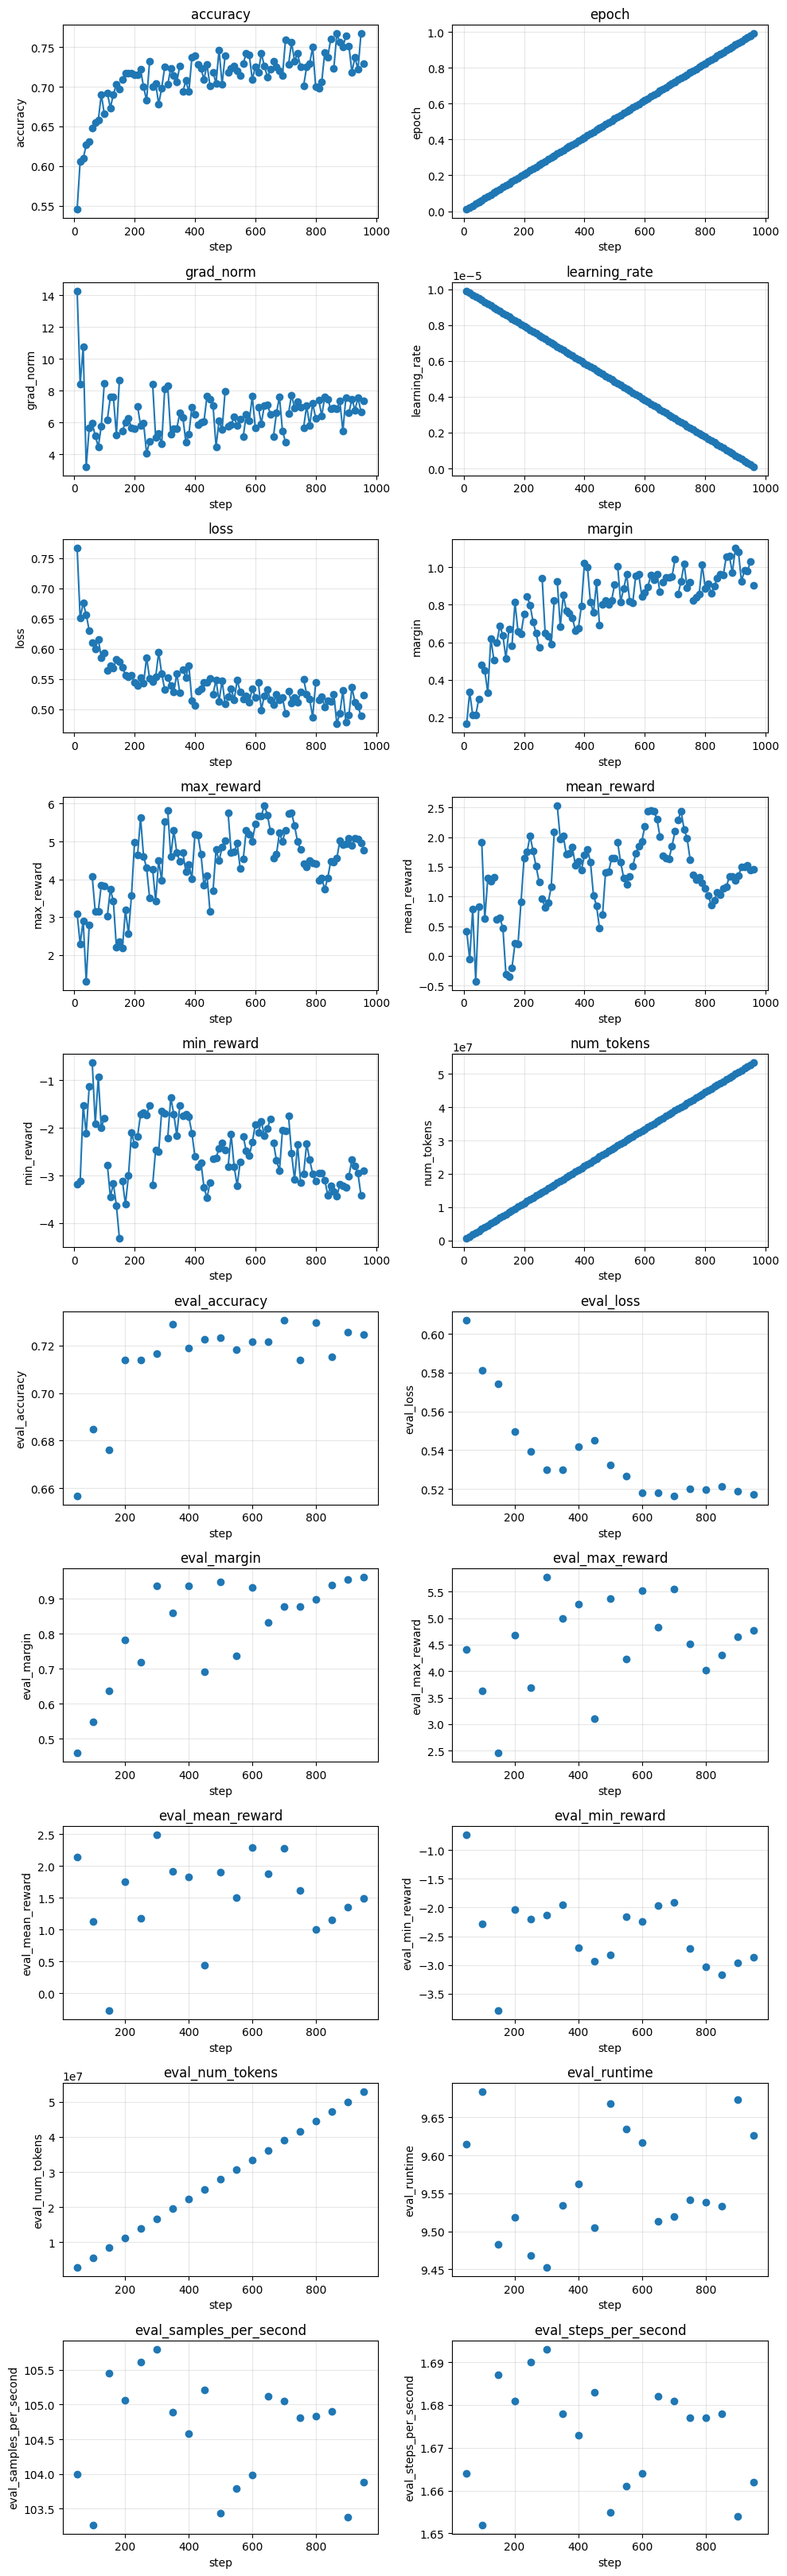

In [3]:
TRAINER_STATE_PATH = Path("/proj/inf-scaling/iris/dl-rm-loss/reward_modeling/Qwen2-0.5B-Reward-clean-BT/checkpoint-969/trainer_state.json")
plot(TRAINER_STATE_PATH)

,accuracy,epoch,grad_norm,learning_rate,loss,margin,max_reward,mean_reward,min_reward,num_tokens,...,eval_accuracy,eval_loss,eval_margin,eval_max_reward,eval_mean_reward,eval_min_reward,eval_num_tokens,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.529687,0.01032,7.413351,0.000010,0.7714,0.068419,4.742296,2.540822,0.037685,561009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.582812,0.02064,5.472126,0.000010,0.6713,0.147150,2.838245,1.060140,-0.580193,1156094.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.568750,0.03096,8.643081,0.000010,0.6790,0.105280,5.274604,3.872424,2.457616,1718200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.560937,0.04128,3.247902,0.000010,0.6878,0.087185,6.740716,5.412214,3.872231,2277421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.625000,0.05160,7.240934,0.000009,0.6546,0.206797,5.971795,3.950998,2.142901,2825107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


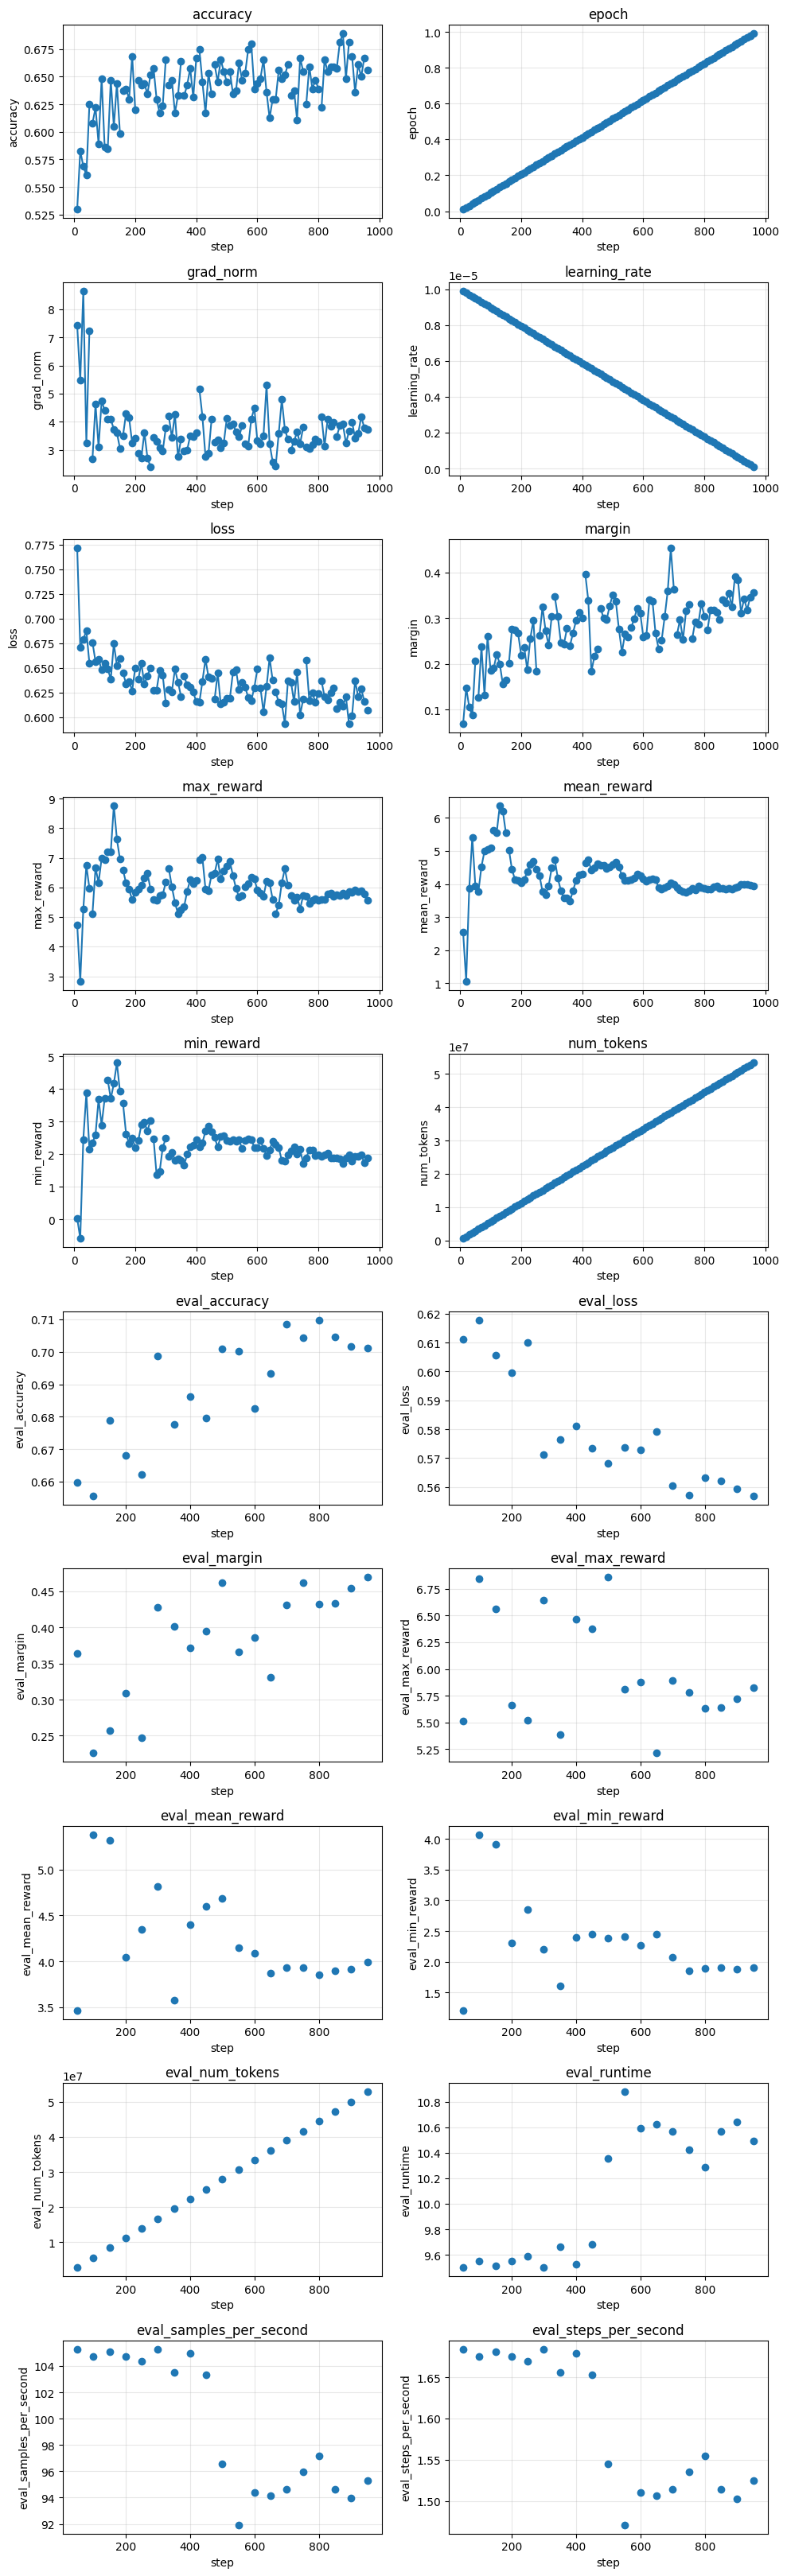

In [4]:
TRAINER_STATE_PATH = Path("/proj/inf-scaling/iris/dl-rm-loss/reward_modeling/Qwen2-0.5B-Reward-noisy-BT/checkpoint-969/trainer_state.json")
plot(TRAINER_STATE_PATH)

,accuracy,epoch,grad_norm,learning_rate,loss,margin,max_reward,mean_reward,min_reward,num_tokens,...,eval_accuracy,eval_loss,eval_margin,eval_max_reward,eval_mean_reward,eval_min_reward,eval_num_tokens,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.545312,0.01032,14.549447,0.000010,0.5604,0.353276,10.182737,2.403106,-5.891050,561009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.593750,0.02064,12.132671,0.000010,0.4901,1.003874,8.327360,1.469432,-6.404455,1156094.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.639062,0.03096,11.403773,0.000010,0.4540,0.884318,9.038404,3.422174,-3.401348,1718200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.648438,0.04128,10.739450,0.000010,0.4565,1.257990,12.957932,3.753057,-5.168848,2277421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.665625,0.05160,8.528964,0.000009,0.4371,2.046897,12.538133,2.581982,-8.482636,2825107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


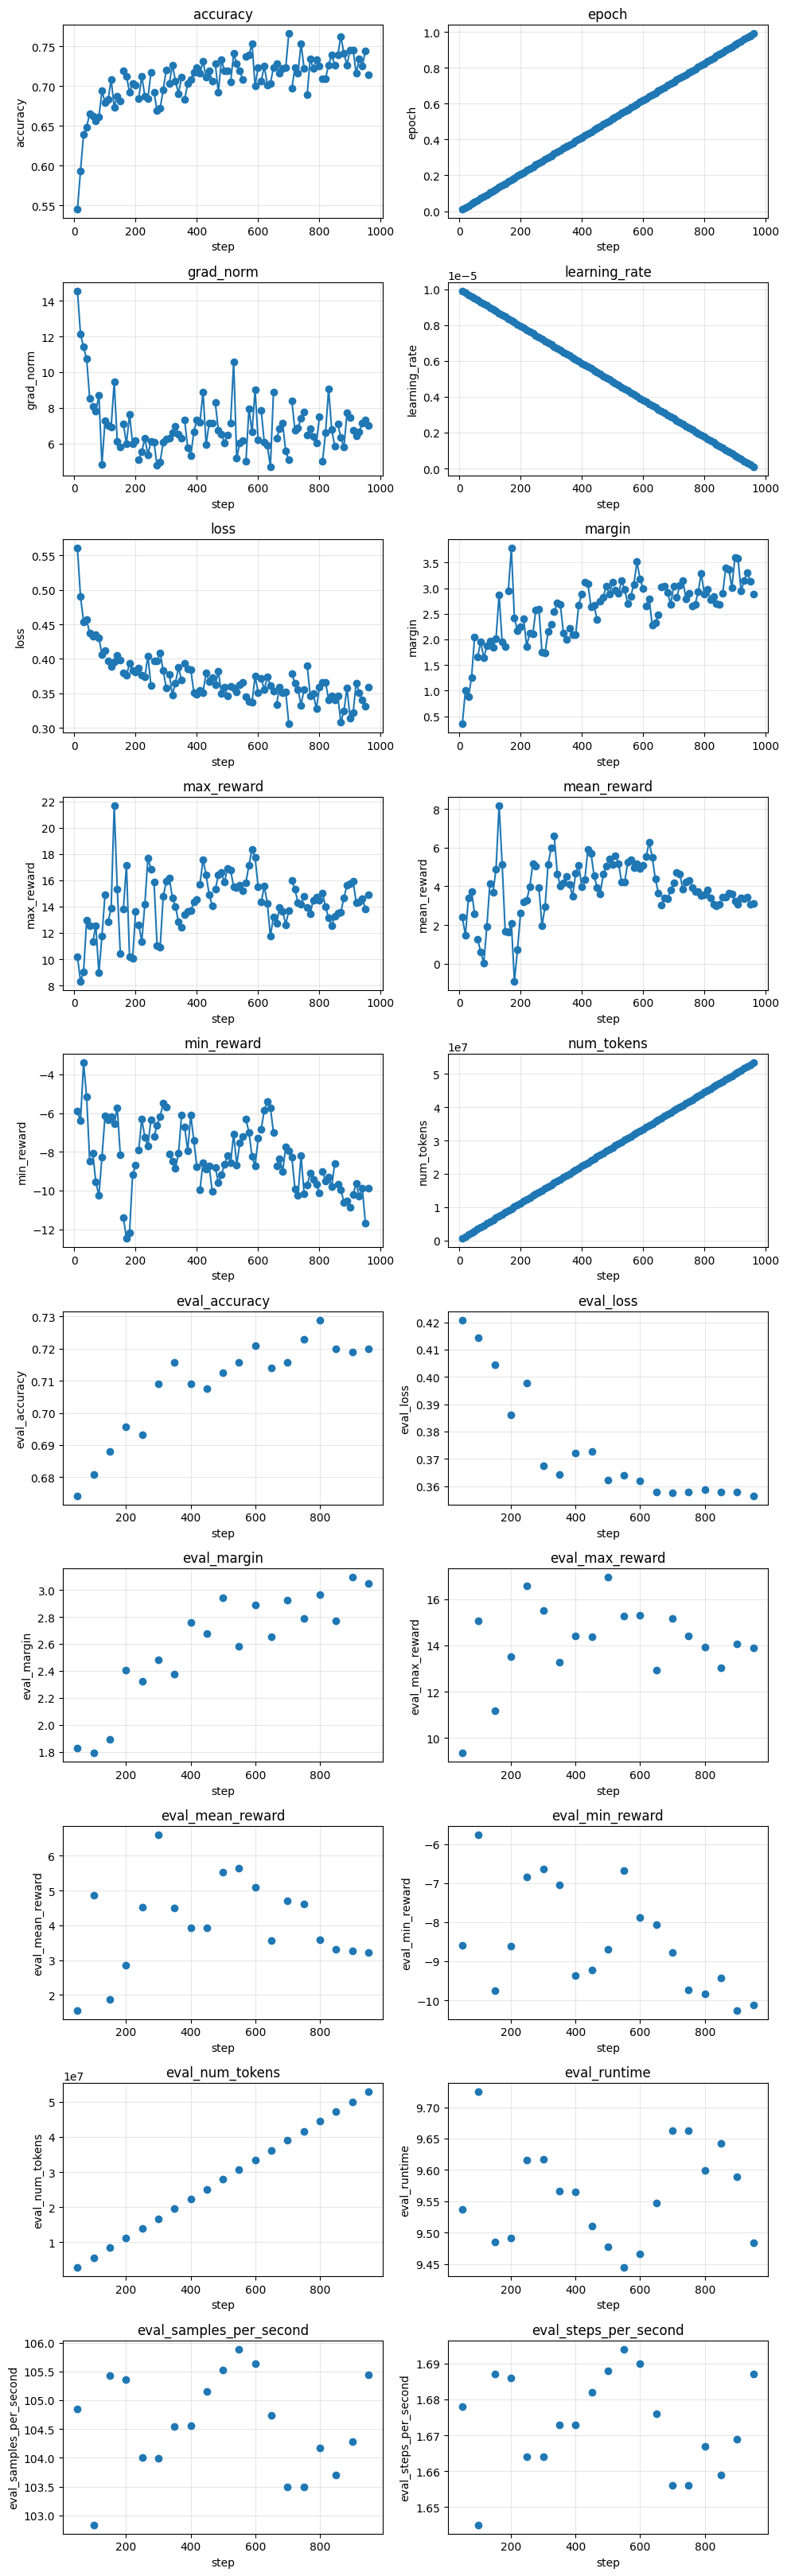

In [5]:
TRAINER_STATE_PATH = Path("/proj/inf-scaling/iris/dl-rm-loss/reward_modeling/Qwen2-0.5B-Reward-clean-GCE07/checkpoint-969/trainer_state.json")
plot(TRAINER_STATE_PATH)

,accuracy,epoch,grad_norm,learning_rate,loss,margin,max_reward,mean_reward,min_reward,num_tokens,...,eval_accuracy,eval_loss,eval_margin,eval_max_reward,eval_mean_reward,eval_min_reward,eval_num_tokens,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.546875,0.01032,13.804827,0.000010,0.5711,0.279264,7.135383,0.640951,-6.117201,561009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.575000,0.02064,9.490351,0.000010,0.5233,0.416142,3.194581,-2.187756,-7.033576,1156094.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.565625,0.03096,12.181155,0.000010,0.5328,0.780393,2.018745,-7.105329,-13.854395,1718200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.560937,0.04128,12.076552,0.000010,0.5394,0.419643,3.132135,-2.991338,-9.276197,2277421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.615625,0.05160,12.635668,0.000009,0.4817,0.780955,10.947337,3.453029,-3.304016,2825107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


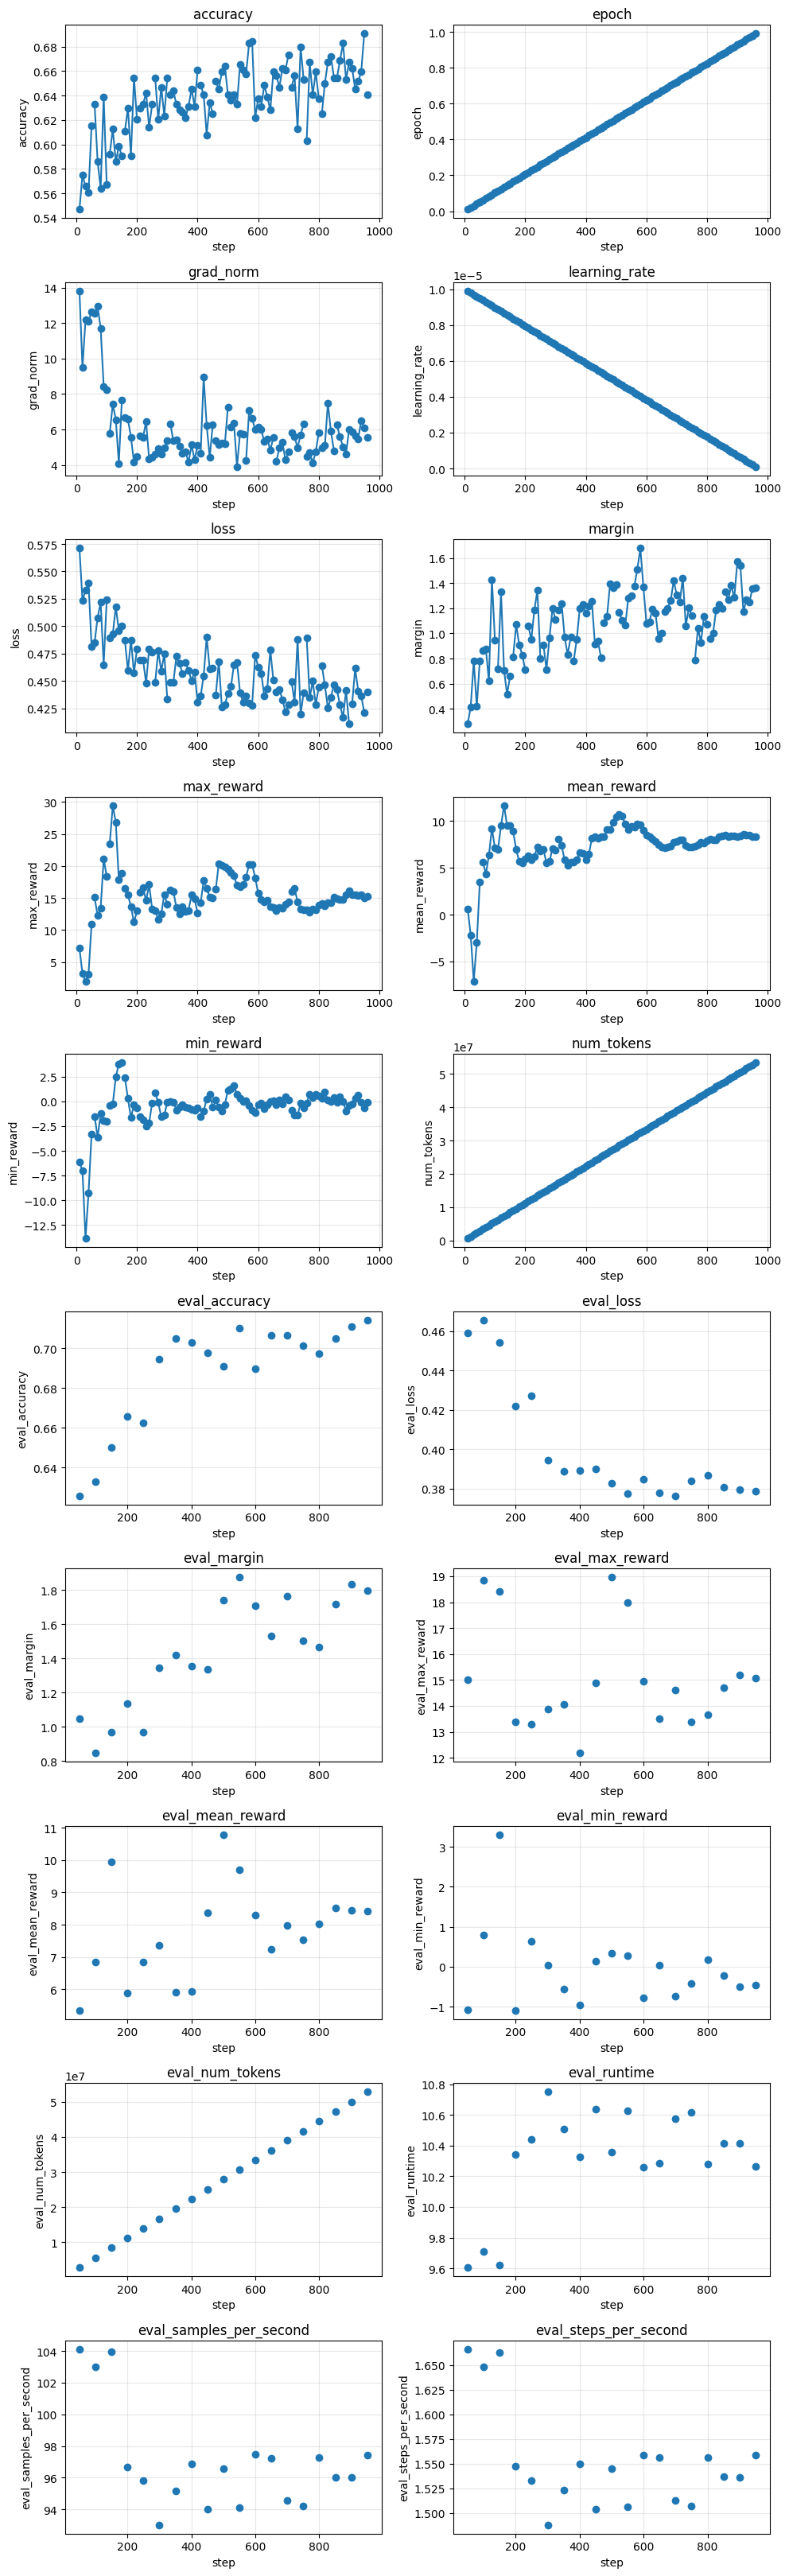

In [6]:
TRAINER_STATE_PATH = Path("/proj/inf-scaling/iris/dl-rm-loss/reward_modeling/Qwen2-0.5B-Reward-noisy-GCE07/checkpoint-969/trainer_state.json")
plot(TRAINER_STATE_PATH)